# Training a Neural Network on CIFAR 10!

We have already built and run a network on MNIST dataset in the previous part. In this part you are going to configure the same system for a different dataset. 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# import the layers
from nnetwork import *
# As usual, a bit of setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## CIFAR 10 Dataset

We are going to build a three-layer neural network and use it for image classification. For this purpose we will be using the famous CIFAR 10 Dataset.


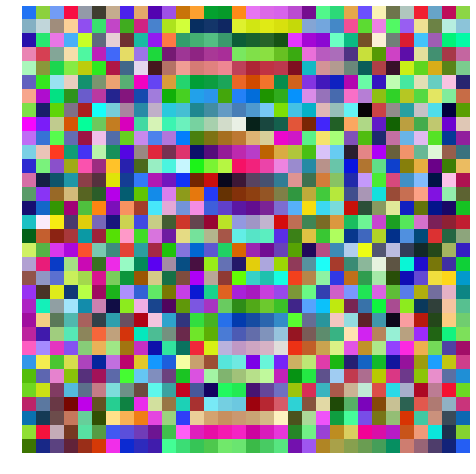

('Train data shape: ', (49000L, 3072L))
('Train labels shape: ', (49000L,))
('Validation data shape: ', (1000L, 3072L))
('Validation labels shape: ', (1000L,))
('Test data shape: ', (1000L, 3072L))
('Test labels shape: ', (1000L,))


In [4]:
from data_utils import *

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the three-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data, put here the path of CIFAR-10 data from previous assignment
    cifar10_dir = './datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    rmimage=np.reshape(mean_image,(32,32,3))
    plt.imshow(rmimage)
    plt.gca().axis('off')
    plt.show()
    
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)



In [32]:
from classifier_trainer import *
trainer = ClassifierTrainer()
model = init_three_layer_neuralnet(weight_scale=1,input_feat_dim=32*32*3, num_neurons=(100,100), num_classes=10) # input size, hidden size, number of classes
three_layer_neuralnetwork(X_train[:1000,:], model,y_train[:1000],0.1,verbose=1); #testing variance ...
print ('')

In [33]:
from classifier_trainer import *
trainer = ClassifierTrainer()
best_model, loss_history, train_acc, val_acc = trainer.train(X_train, y_train, X_val, y_val,
                                             model, three_layer_neuralnetwork,reg=0.1,
                                             num_epochs=30, learning_rate_decay = 0.95,
                                             learning_rate=0.001,update='nestrov-momentum', verbose=True)

('starting iteration ', 0)
Finished epoch 0 / 30: cost 167.694781, train: 0.075000, val 0.087000, lr 1.000000e-03
('starting iteration ', 10)
('starting iteration ', 20)
('starting iteration ', 30)
('starting iteration ', 40)
('starting iteration ', 50)
('starting iteration ', 60)
('starting iteration ', 70)
('starting iteration ', 80)
('starting iteration ', 90)
('starting iteration ', 100)
('starting iteration ', 110)
('starting iteration ', 120)
('starting iteration ', 130)
('starting iteration ', 140)
('starting iteration ', 150)
('starting iteration ', 160)
('starting iteration ', 170)
('starting iteration ', 180)
('starting iteration ', 190)
('starting iteration ', 200)
('starting iteration ', 210)
('starting iteration ', 220)
('starting iteration ', 230)
('starting iteration ', 240)
('starting iteration ', 250)
('starting iteration ', 260)
('starting iteration ', 270)
('starting iteration ', 280)
('starting iteration ', 290)
('starting iteration ', 300)
('starting iteration ', 3

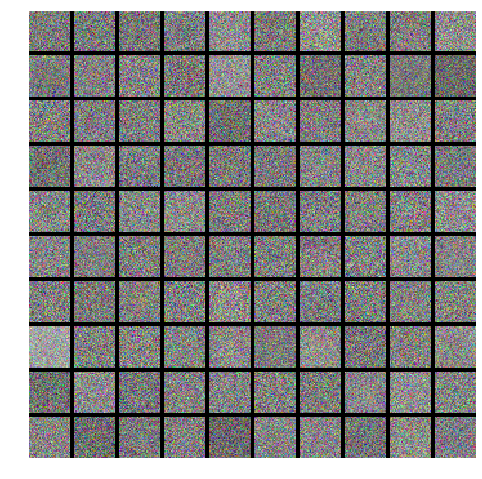

In [34]:
from vis_utils import visualize_grid

# Visualize the weights of the networkB

def show_net_weights(model):
    plt.imshow(visualize_grid(model['W1'].T.reshape(-1, 32, 32, 3), padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

### Plot the training loss evolution history

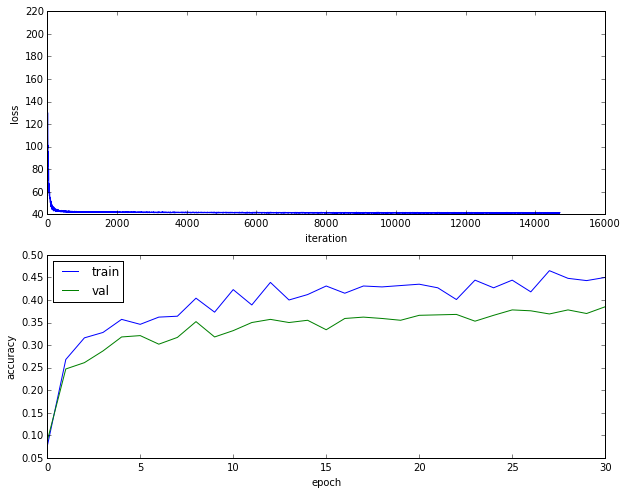

In [35]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
#print train_acc_history
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [36]:
scores_test = three_layer_neuralnetwork(X_test, model)
y_pred_test = np.argmax(scores_test, axis=1)
test_acc = np.mean(y_test == y_pred_test)
print ('Test Accuracy= {}'.format(test_acc))

Test Accuracy= 0.359


Predicted   0    1   2   3   4   5    6   7    8    9   All
Actual                                                     
0          35    3  13   3   2   1    7   4   25   10   103
1           2   44   1   3   0   1    6   5    5   22    89
2          10    5  23  12  14   7   17   7    4    1   100
3           3    9  12  13   8  19   25   3    3    8   103
4           6    5  12   6  24   6   18   6    3    4    90
5           1    7  12  12  13  20   12   5    3    1    86
6           0    7   5  14  15   5   63   1    0    2   112
7           7    3  10  10  14   6    7  35    2    8   102
8          20    9   1   2   2   3    0   1   58   10   106
9           4   25   1   4   2   2    5   8   14   44   109
All        88  117  90  79  94  70  160  75  117  110  1000


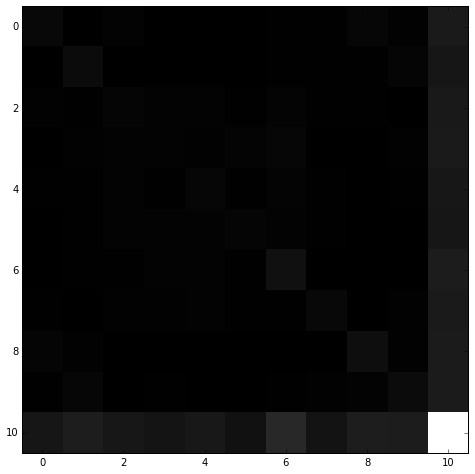

In [37]:
#Confusion Matrix Across classes...
from tools import print_confusion_matrix
df=print_confusion_matrix(y_pred_test,y_test)
print (df)
plt.imshow(df.as_matrix())

In [11]:
np.save('100x100-30-epochs-RMS3-reg0.1-lr-0.001',model)